In [1]:
!pip install scikit-learn

# Imporacion de librerias

In [4]:
# Conjunto de datos
from sklearn import datasets

# Preprocesamiento
from sklearn.model_selection import train_test_split

# Modelo (Regresion lineal)
from sklearn.linear_model import LinearRegression

# Evaluacion
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [10]:
# Datos en bruto
data = datasets.load_diabetes()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [16]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [19]:
print(data.data.shape)

(442, 10)


In [20]:
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# Carga del conjunto de datos en formato de tabla


In [24]:
df_diabetes = datasets.load_diabetes(as_frame=True).frame
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Estudio del conjunto de datos

<Axes: >

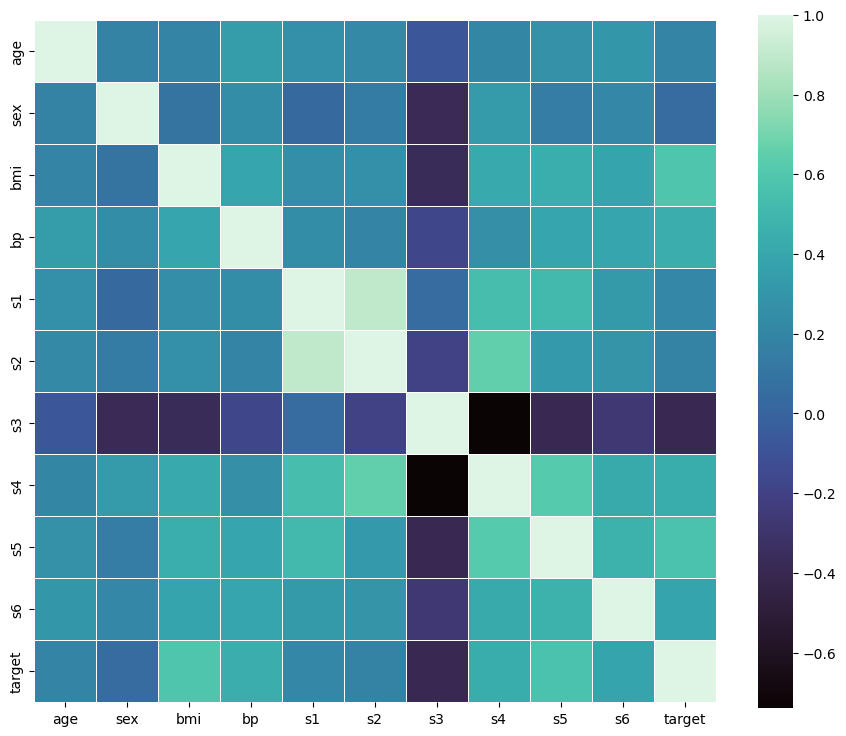

In [25]:
corr = df_diabetes.corr()

f, ax = plt.subplots(figsize=(11,9))

sns.heatmap(corr, cmap="mako", square=True, linewidths=0.5)

# Preprocesamiento de datos

# Seleccion de datos

In [61]:
X = df_diabetes[["bmi", "bp"]]
Y = df_diabetes["target"]

# Viusalizacion de los datos

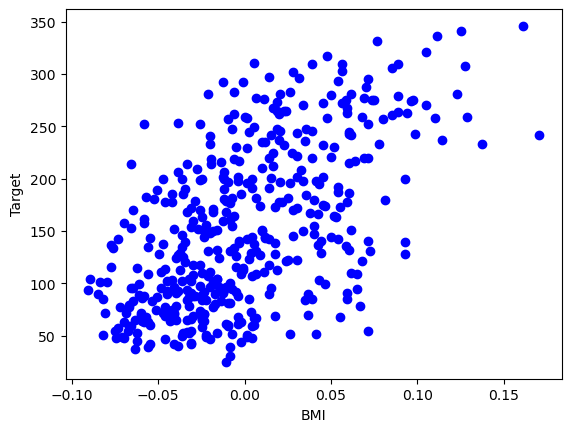

In [28]:
plt.scatter(X, Y, color="blue")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.show()

# Division del conjunto de datos

In [62]:
# Conjunto de entrenamiento, conjunto de valicacion y conjunto de prueba

#Conjunto de entrenamiento (Conjunto de desarollo + conjunto de validacion), conjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Conjunto de desarollo, conjunto de validacion
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)

In [63]:
X_train.shape

(264, 2)

In [64]:
X_test.shape

(89, 2)

In [65]:
X_val.shape

(89, 2)

## Creacion del modelo de regresion lineal

In [66]:
# Creacion del modelo
lr = LinearRegression()

# Ajuste del modelo al conjunto de datos de entrenamiento
lr.fit(X_train, Y_train)

LinearRegression()

## Prediccion del conjunto de datos de validacion

In [67]:
y_pred = lr.predict(X_val)
y_pred

array([134.15749666, 134.00238669,  75.40774945, 161.03301557,
       139.43323957, 162.92615606, 265.47862595, 155.64653125,
       224.71340096, 146.22213346, 180.95978193, 188.33592927,
       172.06878525, 227.9456285 , 149.44487722, 116.62882057,
       177.73703817, 124.65554388, 152.91925349, 222.14596825,
        73.48615763, 131.79902627, 143.42678449, 146.08599104,
        51.4051345 , 199.37169895, 212.57594426, 127.74214523,
        88.64687956, 200.83744464, 175.74737514, 229.41137419,
       135.75938477, 101.75935102, 124.72361509, 143.94121805,
       230.07143394,  89.17079689, 236.99173516, 249.72591548,
       226.01455291, 186.27819504, 152.70555609, 130.83823036,
       140.9226879 , 121.92826612, 151.75424396, 169.03128755,
       142.83479595, 268.42908488, 100.07042416, 126.63572313,
       165.89558255, 116.11438701,  81.36725475, 116.11438701,
        73.27246023, 145.64911247, 244.57209612, 200.26442365,
       142.67968598, 165.66291759, 110.44613409, 161.83

## Validacion de resultados

In [69]:
df_res = pd.DataFrame(columns=["BMI", "BP", "Valor real", "Valor Predicho"])
df_res["BMI"] = X_val["bmi"]
df_res["BP"] = X_val["bp"]
df_res["Valor real"] = Y_val
df_res["Valor Predicho"] = y_pred
df_res["Diferencia"] = abs(df_res["Valor Predicho"] - df_res["Valor real"])
df_res.head()

,BMI,BP,Valor real,Valor Predicho,Diferencia
431,-0.030996,0.021872,66.0,134.157497,68.157497
179,-0.015906,-0.012556,151.0,134.002387,16.997613
86,-0.075186,-0.040099,55.0,75.407749,20.407749
209,-0.018062,0.066629,77.0,161.033016,84.033016
426,-0.034229,0.043666,120.0,139.433240,19.433240


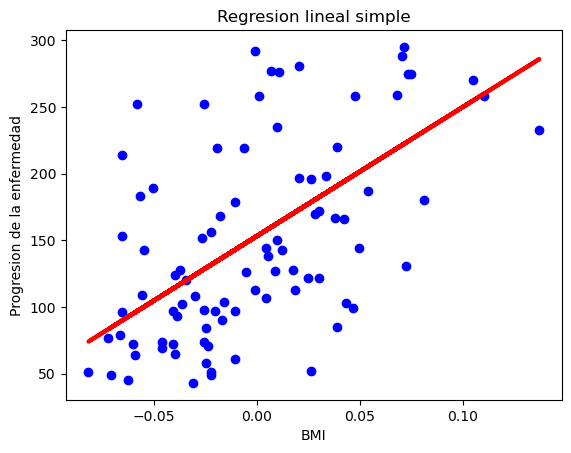

In [44]:
plt.scatter(X_val, Y_val, color="blue")
plt.plot(X_val, y_pred, color="red", linewidth=3)
plt.title("Regresion lineal simple")
plt.xlabel("BMI")
plt.ylabel("Progresion de la enfermedad")
plt.show()

In [45]:
print("Progresion de la enfermedad = ", lr.coef_[0], "BMI + ", lr.intercept_, lr.coef_[1], " BP +")

Progresion de la enfermedad =  968.625404734397 BMI +  153.0723450395456


## Metricas

In [55]:
print("Raiz error cuadtratico medio: ",  np.sqrt(mean_squared_error(Y_val, y_pred)))
print("Coeficiente de determinacion: %2f" % r2_score(Y_val, y_pred))

Raiz error cuadtratico medio:  61.07050479062607
Coeficiente de determinacion: 0.296449


## Prediciendo de datos futuros

In [56]:
y_pred = lr.predict(X_test)

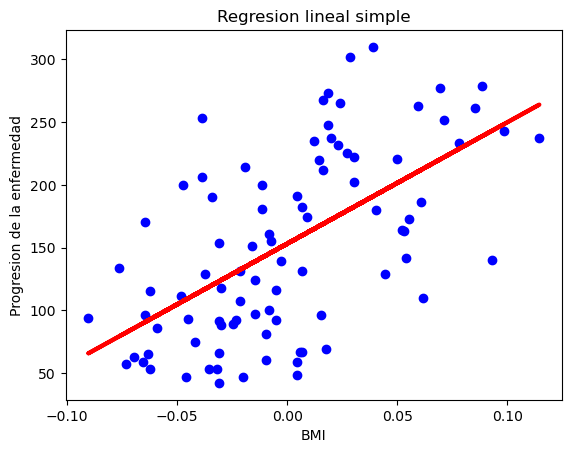

In [58]:
plt.scatter(X_test, Y_test, color="blue")
plt.plot(X_test, y_pred, color="red", linewidth=3)
plt.title("Regresion lineal simple")
plt.xlabel("BMI")
plt.ylabel("Progresion de la enfermedad")
plt.show()

In [60]:
print("Raiz error cuadtratico medio: ",  np.sqrt(mean_squared_error(Y_test, y_pred)))
print("Coeficiente de determinacion: %2f" % r2_score(Y_test, y_pred))

Raiz error cuadtratico medio:  59.162691286015225
Coeficiente de determinacion: 0.352204
